In [22]:
#predict rating in software
# import working with data libraries
import pandas as pd
import numpy as np
import datetime as dt

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import os
import json
import gzip
from urllib.request import urlopen

In [16]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [3]:
### load the review data

review_data = []
with gzip.open('Software.json.gz') as f:
    for l in f:
        review_data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of reviews
print(len(review_data))

# first row of the list
print(review_data[10])

459436
{'overall': 2.0, 'vote': '3', 'verified': True, 'reviewTime': '05 3, 2009', 'reviewerID': 'A1CUJ6ZT82H7LS', 'asin': '0132147556', 'style': {'Format:': ' Paperback'}, 'reviewerName': 'Brian', 'reviewText': "Maybe it's just me (I have no marketing background but desperately want to learn for my start-up) but I cannot get hardly anything out of this text. I have tried very hard to tread through the writing and learn something useful but chapter after chapter seems to be the exact same thing... overly wordy, rambling & unnecessarily academic writing with no comprehensible message behind it, no strategies I can apply to my own business and no organization that I can make sense of. Feels almost like I'm reading a paper a college student BSed their way through with a whole bunch of long words and cryptic sentences in order to sound impressive. What a rip-off. I paid $70 for this and it has been the most useless book I've paid for in my research process (and I've read 16 other books thu

In [10]:
# convert list into pandas dataframe

all_products = {}
df_review = pd.DataFrame.from_dict(review_data)

#filter out the non-verified reviews, and leave only the columns we want
df_review = df_review[df_review['verified']==True][["overall", "reviewTime", "asin", "reviewText", "summary"]]
print(len(df_review))
df_review["reviewTime"] = pd.to_datetime(df_review["reviewTime"], format="%m %d, %Y")
df_review.head()
# for x in df_review:
#     all_products.add(x['asin'])

309345


,overall,reviewTime,asin,reviewText,summary
0,4.0,2014-03-11,0077613252,The materials arrived early and were in excell...,Material Great
1,4.0,2014-02-23,0077613252,I am really enjoying this book with the worksh...,Health
2,1.0,2014-02-17,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?
3,3.0,2014-02-17,0077613252,This book was missing pages!!! Important pages...,missing pages!!
5,4.0,2011-08-15,0132147556,"Strong backgroung, good read, quite up to date...",E-marketing 6th ed


In [24]:
print(df_review["reviewTime"][0].year)


2014


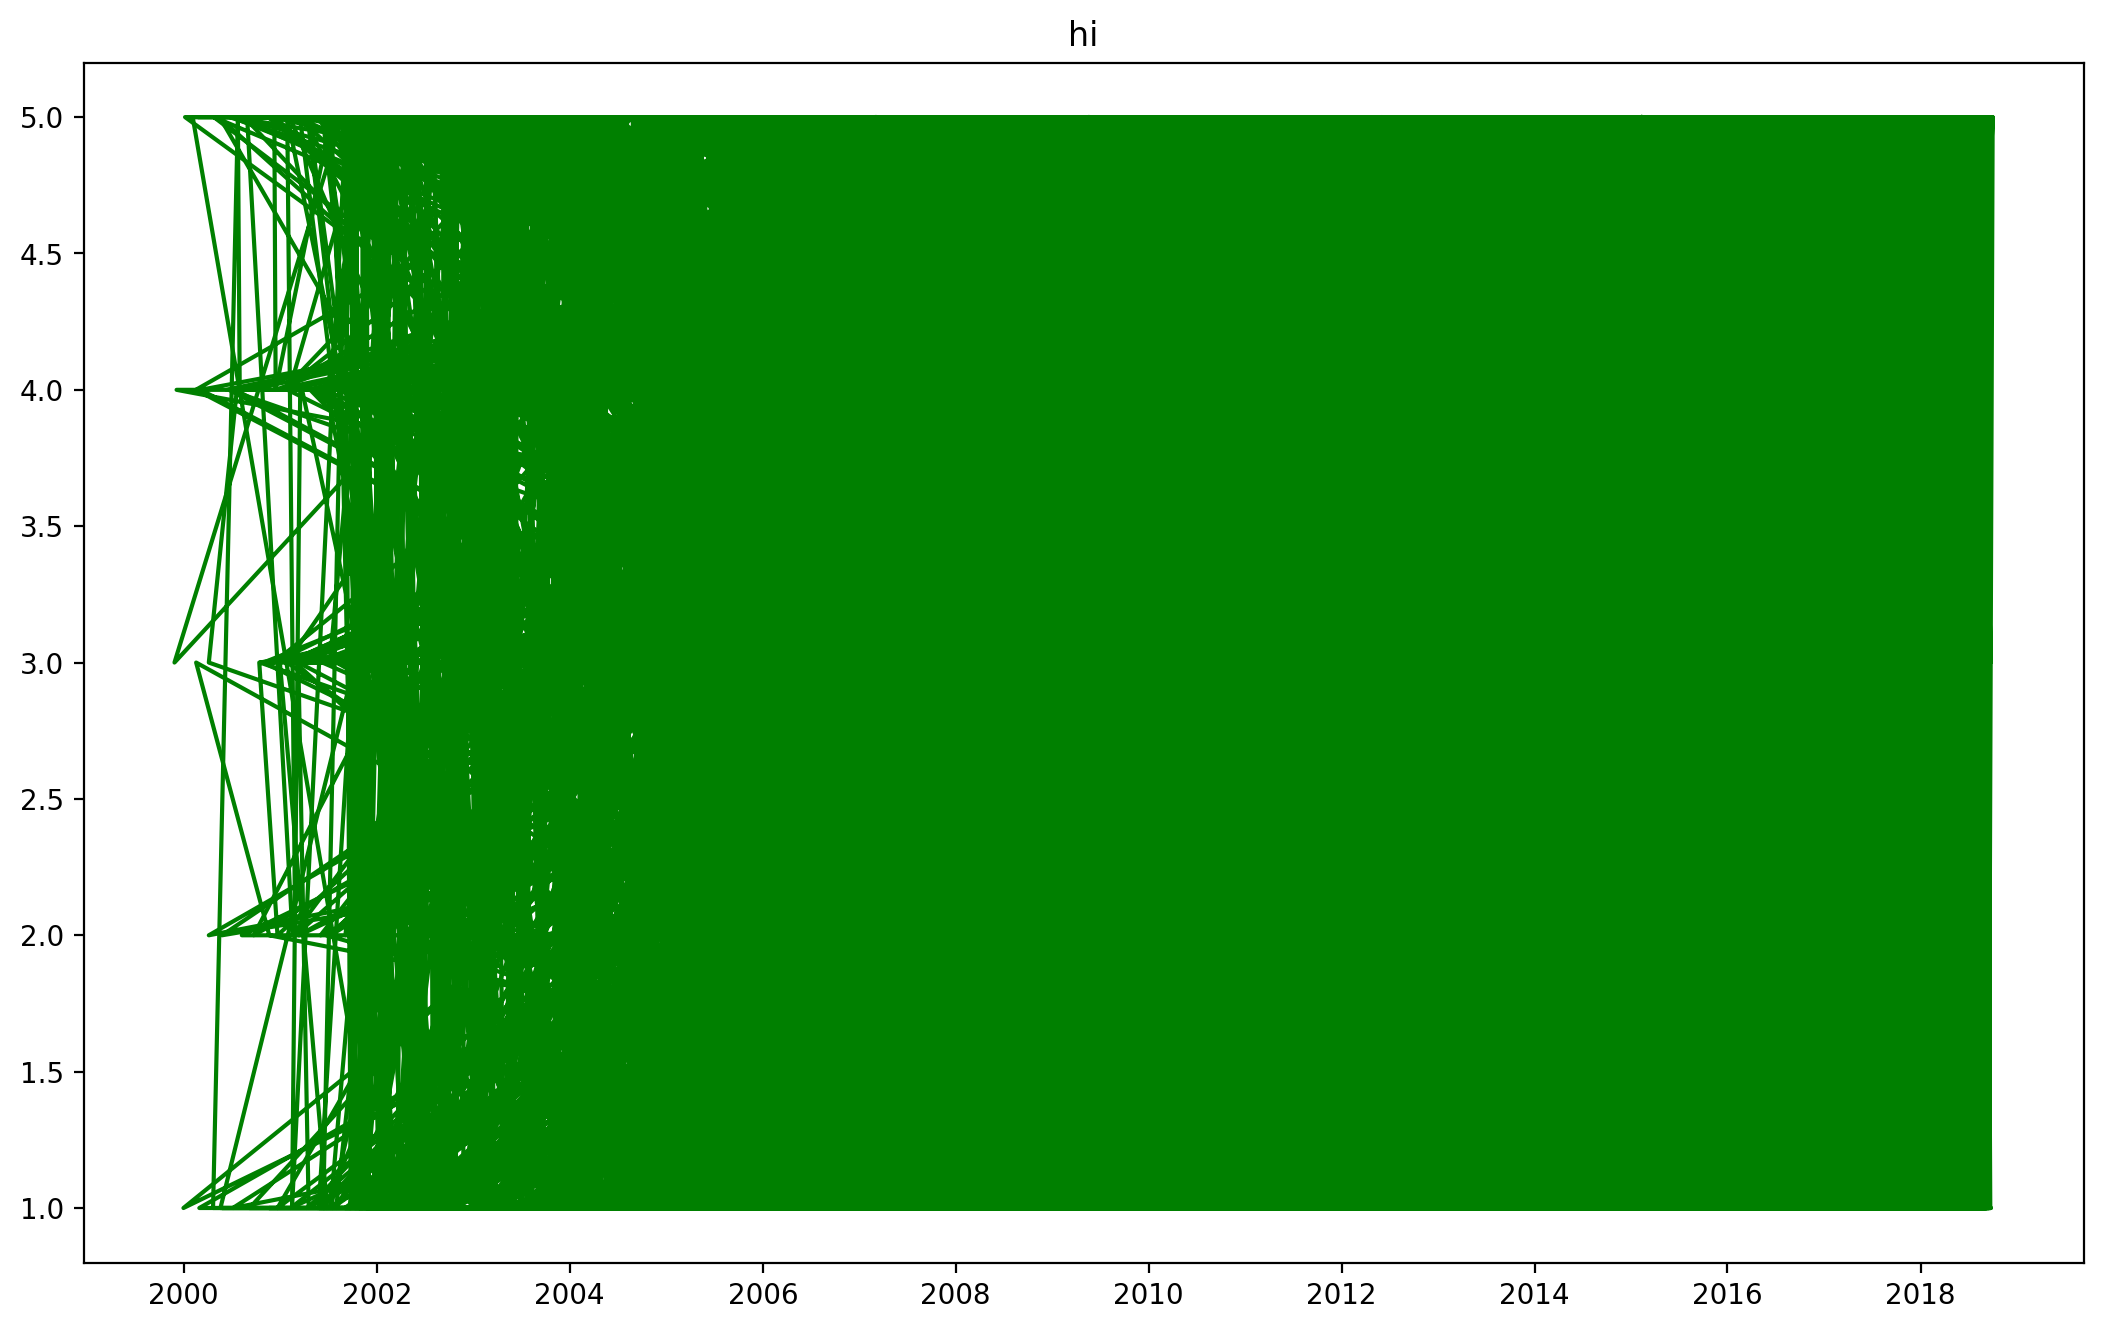

In [17]:
df_review.groupby(pd.to_datetime(df_review['Date']), sort=False)['Rep'].size().plot()